In [168]:


#  <----------  Question 1  ---------->

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# load the data
data = pd.read_csv("winequality-white.csv", delimiter = ';')

print("Shape : ", data.shape)

x = data.drop(['alcohol','quality'],axis=1)
y=data['alcohol']

# train test split function
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.3)

print('original x data shape: ', x.shape)
print('original y data shape: ', y.shape)
print('x train shape: ', x_train.shape)
print('x test shape: ', x_test.shape)
print('x train shape: ', x_train.shape)
print('y test shape: ', y_test.shape)



Shape :  (4898, 12)
original x data shape:  (4898, 10)
original y data shape:  (4898,)
x train shape:  (3428, 10)
x test shape:  (1470, 10)
x train shape:  (3428, 10)
y test shape:  (1470,)


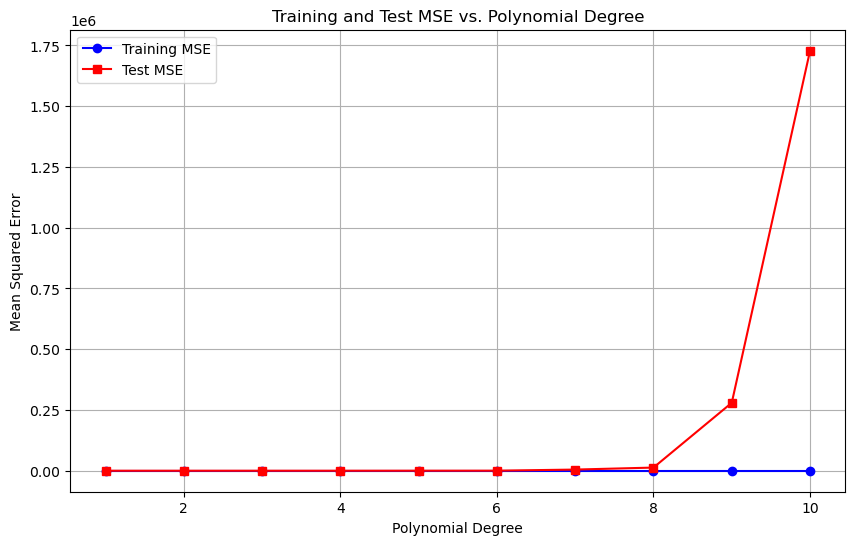

In [127]:

# Initialize lists to store MSE values
mse_train_list = []
mse_test_list = []
degrees = range(1, 11)

# Loop over different polynomial degrees
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_test = poly.transform(x_test)  # Correctly transform x_test

    model = LinearRegression()
    model.fit(x_poly_train, y_train)

    # Predictions
    y_train_pred = model.predict(x_poly_train)
    y_test_pred = model.predict(x_poly_test)  # Correctly predict using transformed x_test

    # Calculate MSE for both training and test sets
    mse_train = np.mean((y_train - y_train_pred) ** 2)
    mse_test = np.mean((y_test - y_test_pred) ** 2)

    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)



In [170]:
print("Training data accuracy: ", mse_train)
print("Test data accuracy: ", mse_test)

Training data accuracy:  0.19792094956804412
Test data accuracy:  1728325.5465548155


- import the necessary libraries
- after loading the dataset, we view the shape to check the number of rows and columns respectively
- we drop `alcohol` and `quality` as they are not used for these features `alcohol` is our target variable
- split the data into train and test, with 70% training and 30% used for testing
- the print functions help us confirm that the data has been split
- we then create an empty list to store mean square error values
- for loop loops over the attributes
- the training data is transformed into a polynomial and a linear regression applied to it
- a prediction of training data is made and assigned to a variable
- for the accuracy of the model, the mean difference of the squared sum of predicted and actual values is used, i.e. mean squared error.
- the mean squared value is stored and appended to the empty list
- the training accuracy is 0.1979
- the test data accuracy is 1728325.55 which is high for the model. the model has a high test data error.mel overfitting

## plot
- the blue line (training MSE) is low across the degres which indicates the model fits well for training data
- the red line (test MSE) is low up until 7. it then increases drastically
- tha shrap increase is due to overfitting in test data
- this data error is high for this model

In [5]:
## Question 2
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = pd.read_csv("winequality-white.csv", delimiter = ';')

# *Binary Classification Task:*
# target variable is selected and target variable is removed from selected feature
x = data.drop(['quality'],axis=1)
y=data['quality']

# target variable ‘quality’ is transformed to binary (1 for greater than and equal to 6 and 0 for less than 6)
y_transform = (data['quality'] >= 6).astype(int)

# data is split into 70% train and 30% test data
x_train2, x_test2,  y_train2, y_test2 = train_test_split(x, y_transform, test_size = 0.3)

# logistic regression model training
model2 = LogisticRegression(solver="liblinear") 
model2.fit(x_train2, y_train2)

# make prediction on test data
y_pred2 = model2.predict(x_test2) 

# create confusion matrix
matrix2 = confusion_matrix(y_test2, y_pred2)
# create classification report
rep2 = classification_report(y_test2, y_pred2)
# calculate accuracy score
accuracy2 = accuracy_score(y_test2, y_pred2)

# print model performance
print("Accuracy:", accuracy2)
print("Confusion Matrix:", matrix2)
print("Classification Report:", rep2)


# *Multi-class Classification Task:*
y_multi = data['quality']

# Split data into 70% train and 30% test 
x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(x, y_multi, test_size=0.3, random_state=8)

# Train the multi-class logistic regression model
model_multi = LogisticRegression(random_state=42, multi_class='ovr', solver = 'liblinear')  # ovr means One-vs-Rest
# model fitting
model_multi.fit(x_train_multi, y_train_multi)

Accuracy: 0.7394557823129252
Confusion Matrix: [[220 290]
 [ 93 867]]
Classification Report:               precision    recall  f1-score   support

           0       0.70      0.43      0.53       510
           1       0.75      0.90      0.82       960

    accuracy                           0.74      1470
   macro avg       0.73      0.67      0.68      1470
weighted avg       0.73      0.74      0.72      1470



LogisticRegression(multi_class='ovr', random_state=42, solver='liblinear')

**Binary classification logistic regression**

•	The target variable is selected and target variable is removed from selected feature.
•	The target variable ‘quality’ is transformed to binary (1 for greater than and equal to 6 and 0 for less than 6).
•	The data is split into 70% train and 30% test data.
•	Training logistic regression model with liblinear solver
•	Making predictions on test data
•	Creating confusion matrix
•	Creating classification report 
•	Calculating accuracy score
•	Printing model performance and acPerformance metrics interpretation: curacy

The model has an accuracy of 74.9% and has 252 false positive and 117 false  The gative.

quality < 6 has 65% precision and quality >= 6 has 78% precision.

Also, the F1 score shows that the model shows strong performance in class 1 where quality >= 6

**Multi-class classification logistic regression**

•	The target variable is selected.
•	The data is split into 70% train and 30% test data.
•	Training logistic regression model with liblinear solver and one vs rest multi_class

Performance metrics interpretation: The model has an accuracy of 53.2%. As per the confusion matrix columns 3, 4, 7, 8 and 9 have almost no correct predictions. The recall score of column 6 has 83% correctly identified positive instances

## Question 3 ##

<>:31: SyntaxWarning: invalid escape sequence '\l'
<>:32: SyntaxWarning: invalid escape sequence '\h'
<>:57: SyntaxWarning: invalid escape sequence '\l'
<>:31: SyntaxWarning: invalid escape sequence '\l'
<>:32: SyntaxWarning: invalid escape sequence '\h'
<>:57: SyntaxWarning: invalid escape sequence '\l'
C:\Users\C2IN\AppData\Local\Temp\ipykernel_13028\985531574.py:31: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\lambda$", fontsize=18)
C:\Users\C2IN\AppData\Local\Temp\ipykernel_13028\985531574.py:32: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("$\hat{w}^{ridge}$ ", rotation=0, fontsize=18)
C:\Users\C2IN\AppData\Local\Temp\ipykernel_13028\985531574.py:57: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\lambda$", fontsize=14)


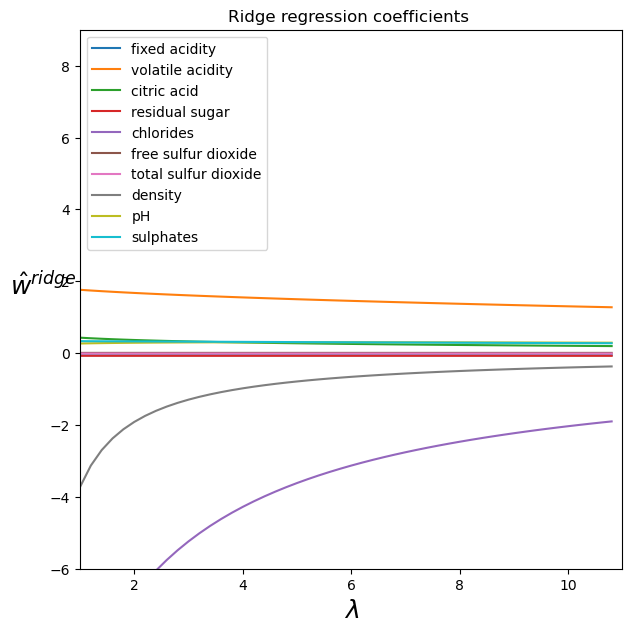

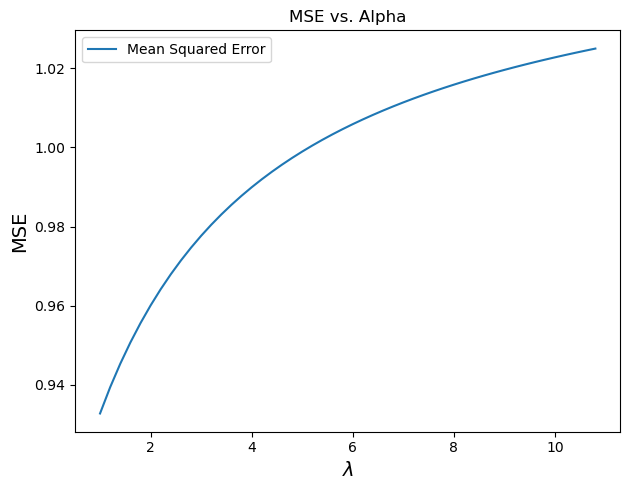

In [3]:
######       question 3 code solution    #################

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

data = pd.read_csv("winequality-white.csv", delimiter = ';')
x = data.drop(['alcohol','quality'],axis=1)
y=data['alcohol']
x_train, x_test,  y_train, y_test = train_test_split(x, y, test_size = 0.3)

ridge_coef = []
alphas = np.arange(1, 11, 0.2)
for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha, random_state=47)
    ridge_reg.fit(x_train, y_train)
    ridge_coef.append(ridge_reg.coef_)

ridge_coef2 = np.array(ridge_coef)

nFeatures = x_train.shape[1]
cmap = mpl.cm.tab10(np.linspace(0, 1, nFeatures))
plt.figure(figsize=(7, 7))
for i in range(nFeatures):
    plt.plot(alphas, ridge_coef2[:, i], color=cmap[i, :], label=x_train.columns[i])

plt.xlabel("$\lambda$", fontsize=18)
plt.ylabel("$\hat{w}^{ridge}$ ", rotation=0, fontsize=18)
plt.title("Ridge regression coefficients ")
plt.legend(loc=2, fontsize=10)
plt.axis([1, 11, -6, 9])
plt.show()

####testing modek

from sklearn.metrics import mean_squared_error, r2_score

# Initializing lists 
mse_list = []
r2_list = []

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha, random_state=47)
    ridge_reg.fit(x_train, y_train)
    y_pred = ridge_reg.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
# Optionally, plot the performance metrics
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_list, label='Mean Squared Error')
plt.xlabel("$\lambda$", fontsize=14)
plt.ylabel("MSE", fontsize=14)
plt.title("MSE vs. Alpha")
plt.legend()
plt.tight_layout()
plt.show()



## Question 3 explanation ##

we are trying to explore coefficients of a ridge regression model for regularization strength denoted as 'alpha' or 'lambda(in symbol format)'

- x is filtered to have all features except `alcohol` and `quality`

- y has only `alcohol` variable as it is the target varible 

- entire dataset is split into train and test dataset names as `x_train`, `x_test`, `y_train`, `y_test`

- empty list named `ridge_coef` is called in for future regression

- `alphas` is range of other vribles used in model building, in this case it is 10 other variables.

- a `for` loop is used for the value of `alpha` , `ridge()` function is applied for alpha value over loop with random state. ridge regression is fitted on training set

- `nFeatures` has values of all features in `x_train, matplotlib features such as mpl and cmap are used for better plot representation

- as `alpha` increases, the regularization increases giving smaller coefficients.

- the main feature of using ridge regression is to help prevent overfitting by shrinking coefficient.

## plot 1: ##
- x-axis represents `alpha` which is regularisation strength, with increase in `alpha` value regularisation becomes stronger

- y-axis represents `w` which is regression coefficient for every variable taken in x value for model building

- from the plot we can clearly see that `fixed acidity`, `citric acid`, `residual sugar`, `density`, `pH`, and `sulphates` have little to no effect in predicting alcohol content in wine

- from the plot `volatile acidity` has inverse effect on alph value

- from plot `chlorides` and `free sulfur dioxide` have negative effect

- for testing the accuracy of the built mdel we are using MSE (mean squared error) evaluation. ridge regression model is applied on testing data and MSE is calculated for predicted value

- the MSE plot helps identify which lpha values result in the best predictive accuracy

## plot 2: ## 
- shows relationship between MSE and alpha

- the plot shows increase in MSE value as alpha increase, which means the model is underfitting and can be made better with more training data.


